# 乃木坂顔画像処理
- 収集した乃木坂の顔画像をリサイズ．
- pythonでの解析に使いやすいように整えます．

In [88]:
%load_ext autoreload
%autoreload 2

import sys, os
import glob
import gzip
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PathPar = '/Users/Daigo/Desktop/'
pchild = ['Asuka_Saito', 'Erika_Ikuta', 'Mai_Shiraishi', 'Nanase_Nishino', 'Nanami_Hashimoto', 'others']

In [ ]:
tmp = '/Users/Daigo/Desktop/Asuka_Saito/NogiSS_115_0.png'
img = Image.open(tmp, 'r').resize((100, 100))
plt.imshow(img)
plt.show()
imm = np.array(img).reshape(1, 100, 100, 3)
plt.imshow(imm[0])
plt.show()



In [82]:
resizer = (256, 256) # originally, nb_channel is last axis, RGB
NogiFaceArray = []
NogiFaceLabel = []

for i, member in enumerate(pchild):
    
    paths = glob.glob(PathPar + member + '/*')
    
    for path in paths:
        img = Image.open(path, 'r')
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # resize all images (128 ,128) 
        img = np.array(img.resize(resizer)) # shape(128, 128, 3)
        
        NogiFaceArray.append(img)
        NogiFaceLabel.append(i)
        
NogiFaceArray = np.array(NogiFaceArray)
NogiFaceLabel = np.array(NogiFaceLabel)
print(NogiFaceArray.shape, NogiFaceLabel.shape)

(6142, 256, 256, 3) (6142,)


[ 473 5723  784 4089 4049]
[0 5 0 3 3]


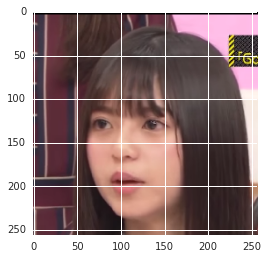

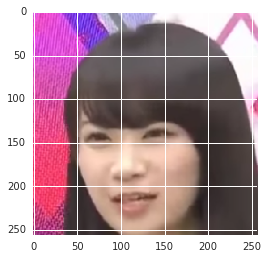

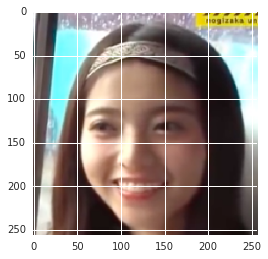

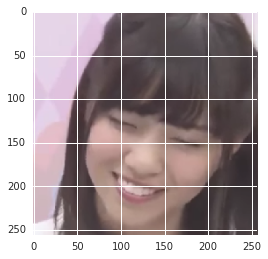

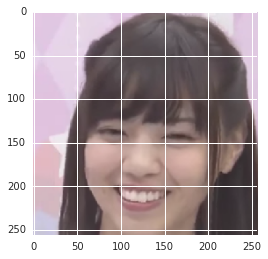

In [84]:
mask = np.random.choice(range(6000), 5, replace = False)
print(mask)
print(NogiFaceLabel[mask])
for nogi in NogiFaceArray[mask]:
    plt.imshow(nogi)
    plt.show()

In [85]:
NogiFaceArray.size

1207566336

In [87]:
with gzip.open('/Users/Daigo/Desktop/NogiFaceData.gz', 'wb') as f:
    f.write(NogiFaceArray)
with gzip.open('/Users/Daigo/Desktop/NogiFaceLabel.gz', 'wb') as f:
    f.write(NogiFaceLabel)

In [89]:
with open('/Users/Daigo/Desktop/NogiFaceData.pkl', 'wb') as f:
    pickle.dump(NogiFaceArray, f)
with open('/Users/Daigo/Desktop/NogiFaceLabel.pkl', 'wb') as f:
    pickle.dump(NogiFaceLabel, f)

(128, 128, 3)
(200, 200, 3)


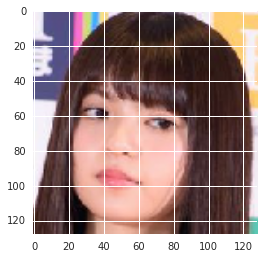

In [80]:
tmparr = NogiFaceArray[0]
print( tmp.shape)

tmpimg = Image.fromarray(tmp)
plt.imshow(tmp)

tmpimg_resize = tmp.resize((200, 200))
print(np.array(tmp).shape)

In [90]:
! git add NogiFaceProcess.ipynb
! git commit -m 'Nogizak'

/Users/Daigo/git/pyworks/GetData/NogiFace
